# High Dimensional Data Visualization

## Parallel Coordinates

C:\Users\Admin\AppData\Local\Temp\ipykernel_4004\1837520160.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap=plt.cm.get_cmap('viridis'))


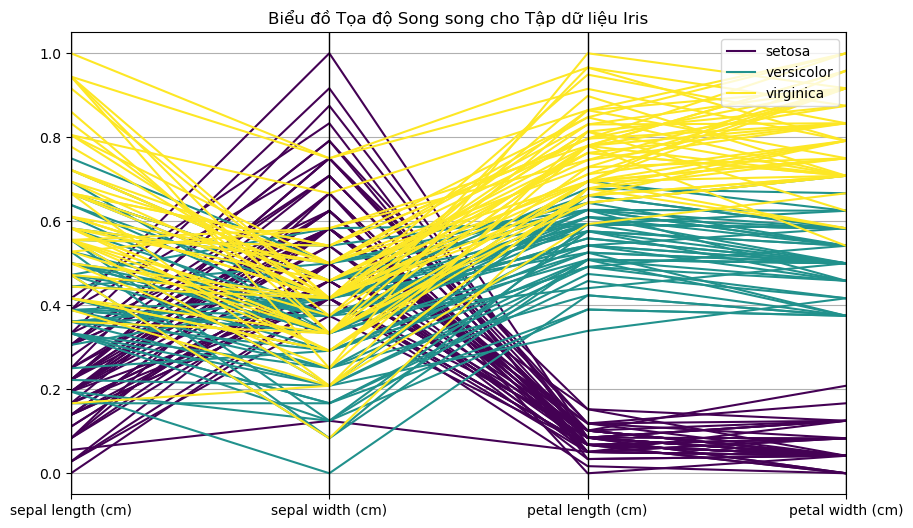

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler
import numpy as np


iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]
feature_cols = iris.feature_names
# Khởi tạo MinMaxScaler
scaler = MinMaxScaler()

iris_scaled_data = scaler.fit_transform(iris_df[feature_cols])
iris_scaled_df = pd.DataFrame(iris_scaled_data, columns=feature_cols)

iris_scaled_df['species'] = iris_df['species']


plt.figure(figsize=(10, 6))

parallel_coordinates(iris_scaled_df, 'species', 
                     colormap=plt.cm.get_cmap('viridis'))
plt.title('Biểu đồ Tọa độ Song song cho Tập dữ liệu Iris')
plt.grid(True)
plt.show()

## Star Coordinates

C:\Users\Admin\AppData\Local\Temp\ipykernel_4004\1453508785.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('rainbow', len(unique_classes))


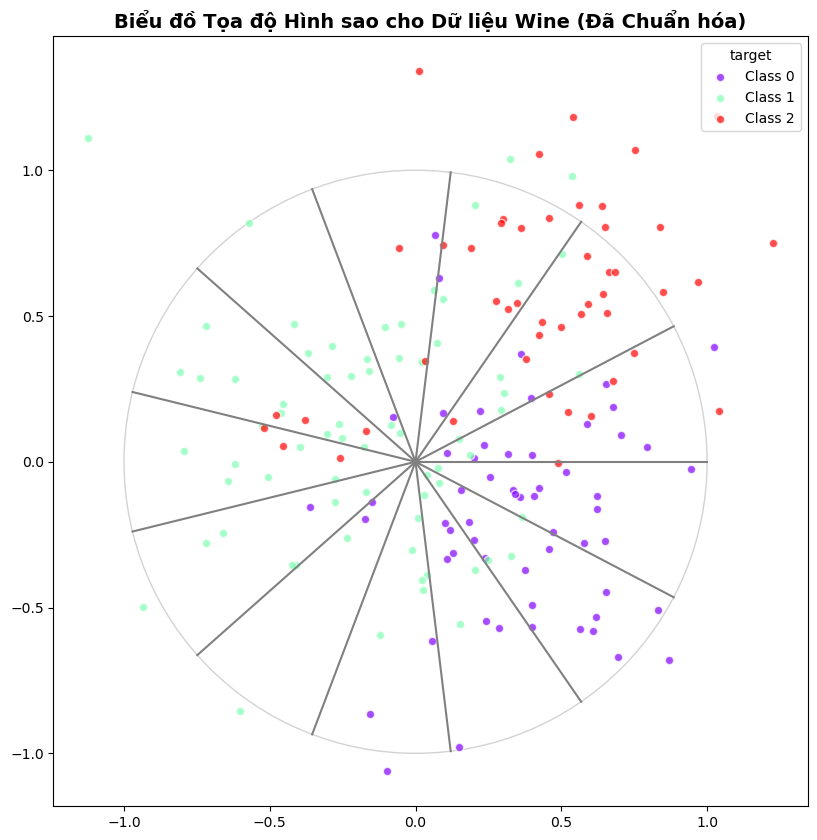

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler

def plot_star_coordinates(df_scaled, class_col, features):
    N = len(features)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
    x_coords = np.sum(df_scaled[features].values * np.cos(angles), axis=1)
    y_coords = np.sum(df_scaled[features].values * np.sin(angles), axis=1)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Biểu đồ Tọa độ Hình sao cho Dữ liệu Wine (Đã Chuẩn hóa)', 
                 fontsize=14, fontweight='bold')
      
    vector_x = np.cos(angles)
    vector_y = np.sin(angles)
    
    for i in range(N):
        ax.plot([0, vector_x[i]], [0, vector_y[i]], color='gray')
        
    circle = plt.Circle((0, 0), 1, color='lightgray', fill=False)
    ax.add_artist(circle)

    unique_classes = df_scaled[class_col].unique()
    colors = plt.cm.get_cmap('rainbow', len(unique_classes))
    
    for i, cls in enumerate(unique_classes):
        subset = df_scaled[df_scaled[class_col] == cls]
        x_subset = np.sum(subset[features].values * np.cos(angles), axis=1)
        y_subset = np.sum(subset[features].values * np.sin(angles), axis=1)
        
        ax.scatter(x_subset, y_subset, 
                   color=colors(i), 
                   label=f'Class {cls}', 
                   alpha=0.7, edgecolors='w')

    ax.set_aspect('equal', adjustable='box') # Giữ tỉ lệ trục 1:1
    ax.legend(title=class_col, loc='upper right')
    plt.show()

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
feature_cols = wine.feature_names
scaler = MinMaxScaler()
wine_scaled_data = scaler.fit_transform(wine_df[feature_cols])
wine_scaled_df = pd.DataFrame(wine_scaled_data, columns=feature_cols)
wine_scaled_df['target'] = wine_df['target']
plot_star_coordinates(wine_scaled_df, 'target', feature_cols)

## Radviz

C:\Users\Admin\AppData\Local\Temp\ipykernel_4004\1534596070.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  radviz(wine_scaled_df, 'Class',color=plt.cm.get_cmap('Set1').colors[:3])


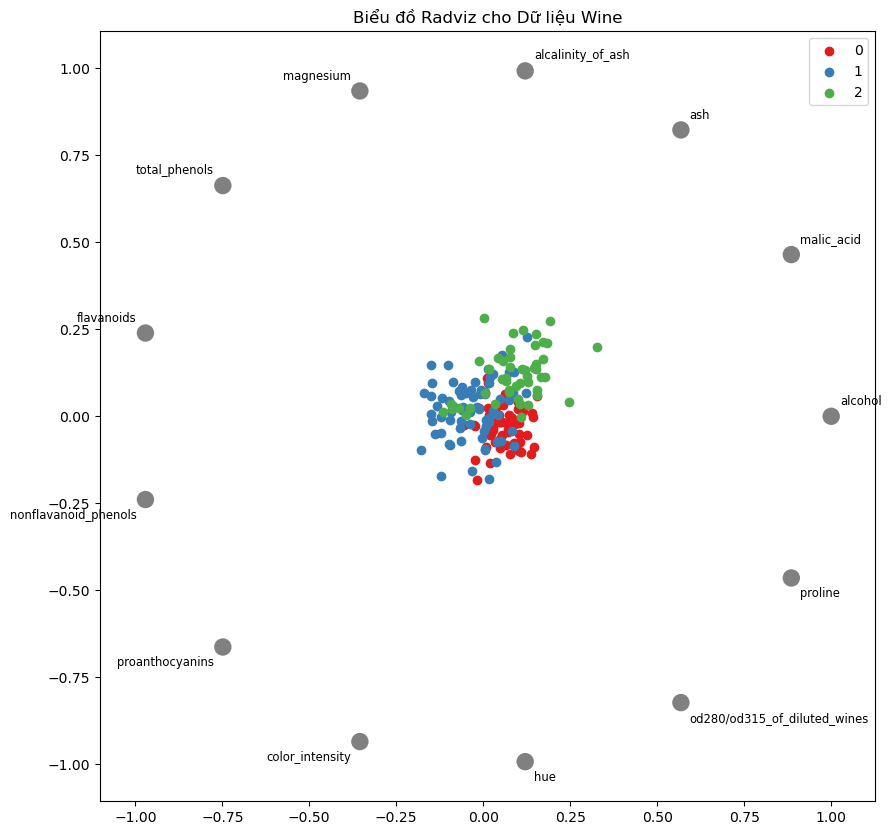

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import radviz

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['Class'] = wine.target 
feature_cols = wine.feature_names
scaler = MinMaxScaler()
wine_scaled_data = scaler.fit_transform(wine_df[feature_cols])
wine_scaled_df = pd.DataFrame(wine_scaled_data, columns=feature_cols)
wine_scaled_df['Class'] = wine_df['Class']

plt.figure(figsize=(10, 10))
radviz(wine_scaled_df, 'Class',color=plt.cm.get_cmap('Set1').colors[:3]) 
plt.title('Biểu đồ Radviz cho Dữ liệu Wine')
plt.show()